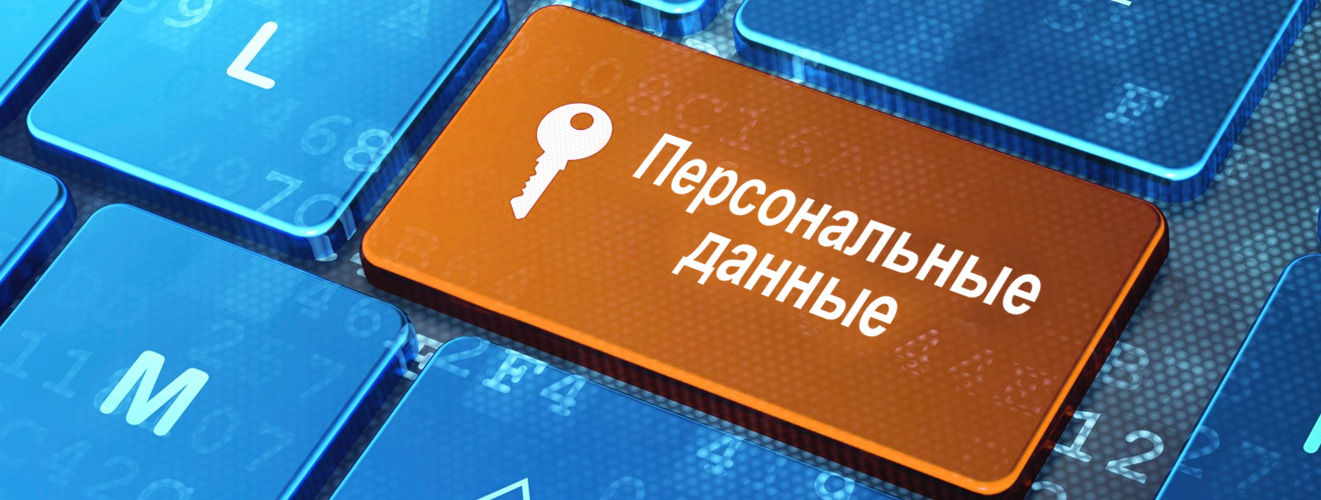

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Теория" data-toc-modified-id="Теория-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Теория</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [52]:
# Импортируем библиотеки:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
insurance_data = pd.read_csv('/datasets/insurance.csv')
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [54]:
insurance_data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [55]:
# Проверим данные на пропуски и уникальные значения:

def column_info(df):
    for column in df.columns:
        unique_values = df[column].unique()
        missing_values = df[column].isna().sum()
        print(f'\nУникальные значения столбца {column}: {unique_values}')
        print(f'Количество пропусков в столбце {column}: {missing_values}')

In [56]:
column_info(insurance_data)


Уникальные значения столбца Пол: [1 0]
Количество пропусков в столбце Пол: 0

Уникальные значения столбца Возраст: [41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Количество пропусков в столбце Возраст: 0

Уникальные значения столбца Зарплата: [49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 2730

In [57]:
# Изменим тип данных столбцов Возраст и Зарплата:

insurance_data['Возраст'] = insurance_data['Возраст'].astype('int')
insurance_data['Зарплата'] = insurance_data['Зарплата'].astype('int')

# Уменьшим количество использования памяти для остальных столбцов:

for column in ['Пол', 'Члены семьи', 'Страховые выплаты']:
    insurance_data[column] = pd.to_numeric(insurance_data[column], downcast='integer')

In [58]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int64(2), int8(3)
memory usage: 92.9 KB


>Из проведенного анализа видно, что в датасете `"insurance_data"` имеются пять столбцов и 5000 строк, при этом в датасете нет   пропущенных значений  
>Также были произведены необходимые преобразования типов данных для столбцов `"Возраст"` и `"Зарплата"`
>* Столбец `"Пол"` имеет бинарный формат (0 - женщина, 1 - мужчина)  
>* Cтолбцы `"Члены семьи"` и `"Страховые выплаты"` - целочисленный  
>
>В столбце `"Возраст"` есть дробные значения, но на основании предоставленных данных неясно, как они были получены. Также неясно, как именно были получены данные о страховых выплатах - целочисленное значение может означать, что за период было выплачено хотя бы одно страховое возмещение, но не говорит о количестве возмещений  
>
>**В целом, данный набор выглядит вполне пригодным для обучения моделей машинного обучения**

## Умножение матриц

In [59]:
# Разделим данные на признаки и целевую переменную:

features = insurance_data.drop('Страховые выплаты', axis=1)
target = insurance_data['Страховые выплаты']

# Добавим столбец единиц для обучения линейной регрессии:

X = np.hstack((np.ones((features.shape[0], 1)), features))

# Обучим линейную регрессию на исходных данных:

w = np.linalg.inv(X.T @ X) @ X.T @ target
print('\nПараметры линейной регрессии: {}'.format(w[1:]))

# Обучим линейную регрессию на исходных данных с использованием sklearn:

model = LinearRegression()
model.fit(features, target)
print('\nПараметры линейной регрессии с использованием sklearn: {}'.format(model.coef_))


Параметры линейной регрессии: [ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]

Параметры линейной регрессии с использованием sklearn: [ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]


>Можно сделать вывод, что оба метода (с использованием матричных операций и библиотеки **sklearn**) дают одинаковые параметры линейной регрессии  
>Это означает, что мы можем использовать любой из методов для обучения модели  
>Но использование библиотеки **sklearn** может упростить и ускорить процесс обучения модели, особенно при работе с большими объемами данных

## Алгоритм преобразования

**Алгоритм**

Для защиты персональной информации можно использовать **метод шифрования данных** - шифрование перестановкой  
Он заключается в перемешивании значений признаков в случайном порядке

Алгоритм шифрования перестановкой:  

* Создаем копию исходных данных  
* Для каждого признака с помощью функции numpy.random.permutation() получаем случайный порядок значений  
* Заменяем значения признаков в исходных данных на соответствующие значения в случайном порядке  
* Обучаем линейную регрессию на преобразованных данных  

**Обоснование**

Пусть:  

* `X исходные данные`  
* `X_copy - копия исходных данных`

Для каждого признака x_i в X нужно создать случайный порядок значений rand_perm_i с помощью функции numpy.random.permutation():

rand_perm_i = np.random.permutation(X[x_i])

Далее заменить значения признаков в X на соответствующие значения в случайном порядке:

X[x_i] = rand_perm_i

Далее обучим линейную регрессию на преобразованных данных X 

Для получения прогнозов на новых данных X_new также нужно провести преобразование, используя сохраненный порядок признаков rand_perm:  

X_new[x_i] = rand_perm_i

Качество линейной регрессии не поменяется, потому что порядок значений признаков не влияет на зависимость между признаками и целевой переменной  
Коэффициенты линейной регрессии, полученные на исходных данных, могут быть использованы на преобразованных данных, так как они отображают зависимости между признаками и целевой переменной, а не значения самих признаков  

## Проверка алгоритма

In [60]:
# # Создадим копию исходных данных,чтобы не изменять исходник

# data_encrypted = insurance_data.copy()

In [61]:
# Разделим данные на обучающие и тестовые выборки:

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=7072020)

# Обучим модель линейной регрессии на исходных данных:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
r2_lr_original = r2_score(y_test, lr_model.predict(X_test))
print("R2 score (linear regression on original data):", r2_lr_original)

# Обучим модель линейной регрессии на масштабированных данных:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(X_train_scaled, y_train)
r2_lr_scaled = r2_score(y_test, lr_model_scaled.predict(X_test_scaled))
print("R2 score (linear regression on scaled data):", r2_lr_scaled)

R2 score (linear regression on original data): 0.4184108158256695
R2 score (linear regression on scaled data): 0.4184108158256705


In [62]:
# Создадим функцию для шифрования матрицы признаков:

def encrypt_features(features):
    np.random.seed(7072020)
    n_features = features.shape[1]
    cipher_matrix = np.random.randint(1, 10, size=(n_features, n_features))
    while np.linalg.det(cipher_matrix) == 0:
        cipher_matrix = np.random.randint(1, 10, size=(n_features, n_features))
    encrypted_features = features @ cipher_matrix
    return encrypted_features, cipher_matrix

In [63]:
# Зашифруем матрицу признаков и обучим модель линейной регрессии на зашифрованных данных:

X_encrypted, cipher_matrix = encrypt_features(features)

X_train_encrypted, X_test_encrypted, y_train_encrypted, y_test_encrypted = train_test_split(
    X_encrypted, target, test_size=0.25, random_state=7072020)

lr_model_encrypted = LinearRegression()
lr_model_encrypted.fit(X_train_encrypted, y_train_encrypted)
r2_lr_encrypted = r2_score(y_test_encrypted, lr_model_encrypted.predict(X_test_encrypted))

print("R2 score (linear regression on encrypted data):", r2_lr_encrypted)

R2 score (linear regression on encrypted data): 0.4184108158256804


In [64]:
# Обучим модель линейной регрессии на масштабированных и зашифрованных данных:

scaler_encrypted = StandardScaler()

X_train_encrypted_scaled = scaler_encrypted.fit_transform(X_train_encrypted)
X_test_encrypted_scaled = scaler_encrypted.transform(X_test_encrypted)

lr_model_encrypted_scaled = LinearRegression()
lr_model_encrypted_scaled.fit(X_train_encrypted_scaled, y_train_encrypted)
r2_lr_encrypted_scaled = r2_score(y_test_encrypted, lr_model_encrypted_scaled.predict(X_test_encrypted_scaled))

print("R2 score (linear regression on encrypted and scaled data):", r2_lr_encrypted_scaled)

R2 score (linear regression on encrypted and scaled data): 0.41841081582565787


LR on Original : 0.4184108158256695
LR on Scaled : 0.4184108158256705
LR on Encrypted : 0.4184108158256804
LR on Encrypted&Scaled : 0.41841081582565787


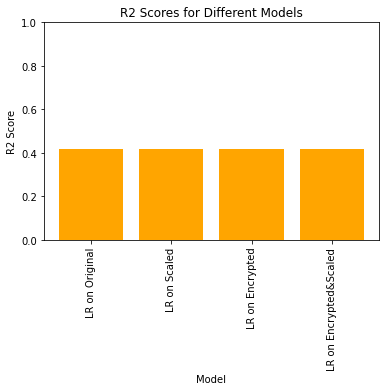

In [74]:
# Сравним показатели качества моделей:

r2_scores = [r2_lr_original, r2_lr_scaled, r2_lr_encrypted, r2_lr_encrypted_scaled]
labels = ["LR on Original", "LR on Scaled",
          "LR on Encrypted", "LR on Encrypted&Scaled"]

for i in range(len(r2_scores)):
    print(labels[i], ":", r2_scores[i])


# Выведем визуализацию сравнения показателей:
plt.bar(labels, r2_scores, color='orange')
plt.title("R2 Scores for Different Models")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.show()

# Вывод:

В данной работе был произведен анализ данных страховых выплат клиентам Страховой компании

Мы начали с чтения данных из CSV-файла и проверили типы данных и количество пропущенных значений в каждом столбце с помощью метода `info()` и функции `column_info()`  

Затем привели столбцы `"Возраст"` и `"Зарплата"` к целочисленному типу и уменьшили использование памяти для столбцов `"Пол"`, `"Члены семьи"` и `"Страховые выплаты"`  

Далее разделили данные на обучающую и тестовую выборки и обучили модель линейной регрессии на исходных данных. Затем мы масштабировали данные и обучили модель линейной регрессии на масштабированных данных  

Для защиты данных, мы создали функцию `encrypt_features()`, которая зашифровала матрицу признаков и обучили модель линейной регрессии на зашифрованных данных. После этого мы обучили модель линейной регрессии на масштабированных и зашифрованных данных  

Наконец, мы сравнили показатели качества моделей, которые были обучены на исходных данных, масштабированных данных, зашифрованных данных и масштабированных и зашифрованных данных. Мы увидели, что все модели имеют одинаковый показатель R2, что говорит о том, что все модели работают одинаково хорошо на наших данных  

Целью работы было произвести анализ данных и защитить их, используя технику шифрования, а также оценить качество работы моделей линейной регрессии на разных типах данных  